# Synthetic Data Generation Example

This notebook generates a single example dataset using a Poisson distribution to simulate crime hotspots. 

**Note:**  
- This single dataset is stored locally as an example in the repository.  
- For robust experimentation, multiple datasets were generated and stored externally (see `../external_data` folder for bulk simulations).

### Local (example) dataset:
- `../data/examples/poisson_example_20x20.csv`

### External bulk simulations (future work):
- `../uncertainty-informed-data/simulations/poisson/`

In [9]:
import sys, os
import json
import numpy as np

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../../"))
sys.path.insert(0, project_root)

config_path = os.path.join("..", "config.json")
with open(config_path, 'r') as f:
    config = json.load(f)

from src.data_generation.hotspots import PoissonHotspots


## parms
rows = config["data_generation"]["rows"]
cols = config["data_generation"]["cols"]
time_steps = config["data_generation"]["time_steps"]
hotspots_num = config["data_generation"]["hotspots_num"]
lam = config["data_generation"]["lam"]

random_state = 42


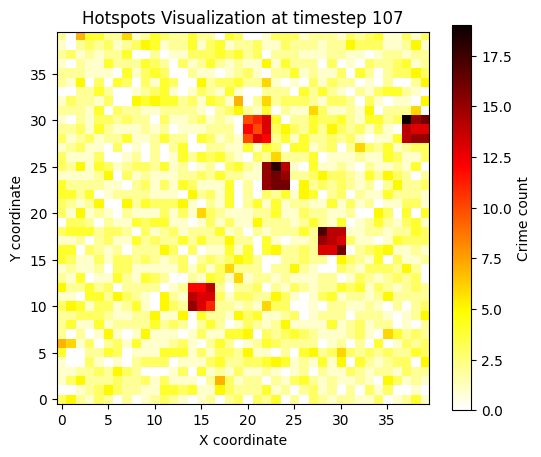

In [10]:
# initial example data
hotspots_generator = PoissonHotspots(rows, cols, time_steps, lam, hotspots_num, random_state=random_state)
data_example = hotspots_generator.generate()

df_example = hotspots_generator.to_dataframe()
output_path = "../data/examples/poisson_example_40x40.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_example.to_csv(output_path, index=False)

hotspots_generator.visualize(timestep=np.random.randint(time_steps))

Saved simulation 1
Saved simulation 2
Saved simulation 3
Saved simulation 4
Saved simulation 5


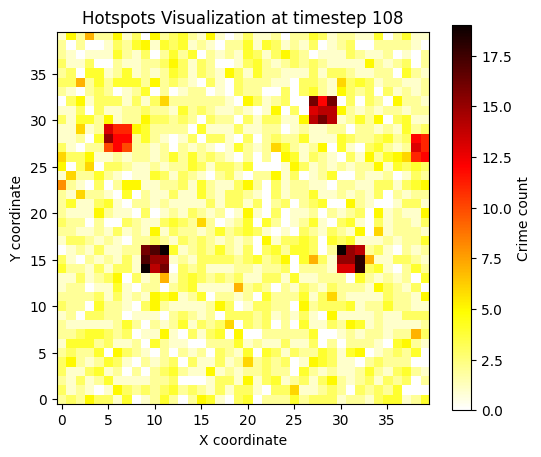

In [11]:
# generate data sets
external_simulations = os.path.abspath(os.path.join(os.path.dirname(project_root), "uncertainty-informed-data", "simulations", "poisson"))
os.makedirs(external_simulations, exist_ok=True)

num_simulations = config["data_generation"]["num_simulations"]
initial_seed = 100  

for i in range(num_simulations):
    random_state = initial_seed + i
    generator = PoissonHotspots(
        rows, cols, time_steps, lam, hotspots_num, random_state=random_state
    )
    data = generator.generate()
    df = generator.to_dataframe()

    filename = f"poisson_simulation_{i+1:02d}_seed_{random_state}.csv"
    file_path = os.path.join(external_simulations, filename)

    df.to_csv(file_path, index=False)
    print(f"Saved simulation {i+1}")

generator.visualize(timestep=np.random.randint(time_steps))